In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
from google.colab import files # kaggle.json dosyasını yükle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pskopat","key":"58220c1293ebea57e6e0519771cf7ee9"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                   Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           1640         31  1.0              
thedrcat/daigt-v2-train-dataset                              DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           3433        280  1.0              
willianoliveiragibin/road-accident-casualties                Road Accident Casualties                      7MB  2023-12-27 19:47:56            890         23  1.0              
marouandaghmoumi/dropout-and-success-student-data-analysis   Dropout and Success: Student Data Analysis   87KB  202

In [ ]:
! kaggle datasets download -d 'prajwalsood/google-fer-image-format'

 95% 64.0M/67.7M [00:02<00:00, 44.8MB/s]
100% 67.7M/67.7M [00:02<00:00, 32.5MB/s]


In [ ]:
! mkdir google-fer-image-format

In [ ]:
! unzip google-fer-image-format.zip -d fer

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: fer/val/HAPPINESS/11299.jpg  
  inflating: fer/val/HAPPINESS/11350.jpg  
  inflating: fer/val/HAPPINESS/11351.jpg  
  inflating: fer/val/HAPPINESS/11375.jpg  
  inflating: fer/val/HAPPINESS/11424.jpg  
  inflating: fer/val/HAPPINESS/11428.jpg  
  inflating: fer/val/HAPPINESS/11430.jpg  
  inflating: fer/val/HAPPINESS/11478.jpg  
  inflating: fer/val/HAPPINESS/11487.jpg  
  inflating: fer/val/HAPPINESS/11507.jpg  
  inflating: fer/val/HAPPINESS/11515.jpg  
  inflating: fer/val/HAPPINESS/11526.jpg  
  inflating: fer/val/HAPPINESS/11533.jpg  
  inflating: fer/val/HAPPINESS/11549.jpg  
  inflating: fer/val/HAPPINESS/11558.jpg  
  inflating: fer/val/HAPPINESS/11567.jpg  
  inflating: fer/val/HAPPINESS/1159.jpg  
  inflating: fer/val/HAPPINESS/11594.jpg  
  inflating: fer/val/HAPPINESS/11620.jpg  
  inflating: fer/val/HAPPINESS/1164.jpg  
  inflating: fer/val/HAPPINESS/11666.jpg  
  inflating: fer/val/HAPPINESS/11683.jpg  
  inflati

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision. all import *
from fastai.vision. learner import _update_first_layer

In [ ]:
path = Path('/content/fer/train/')# eğitim verilerinin klasör yolu

In [ ]:
path.ls()

(#8) [Path('/content/fer/train/CONTEMPT'),Path('/content/fer/train/NEUTRAL'),Path('/content/fer/train/FEAR'),Path('/content/fer/train/SURPRISE'),Path('/content/fer/train/ANGER'),Path('/content/fer/train/DISGUST'),Path('/content/fer/train/SADNESS'),Path('/content/fer/train/HAPPINESS')]

In [ ]:
item_tfms = Resize(48)
batch_tfms = [Normalize.from_stats (*imagenet_stats)]

In [ ]:
dblock=DataBlock (blocks=(ImageBlock, CategoryBlock),
get_items= get_image_files,
get_y = parent_label,
splitter =RandomSplitter(valid_pct= 0.15),
item_tfms = item_tfms,
batch_tfms = batch_tfms)

In [ ]:
dls = dblock.dataloaders(path,bs=256)

In [ ]:
dls.c,len(dls.train_ds),len(dls.valid_ds)

(8, 26116, 6529)

In [ ]:
dls.vocab

['ANGER', 'CONTEMPT', 'DISGUST', 'FEAR', 'HAPPINESS', 'NEUTRAL', 'SADNESS', 'SURPRISE']

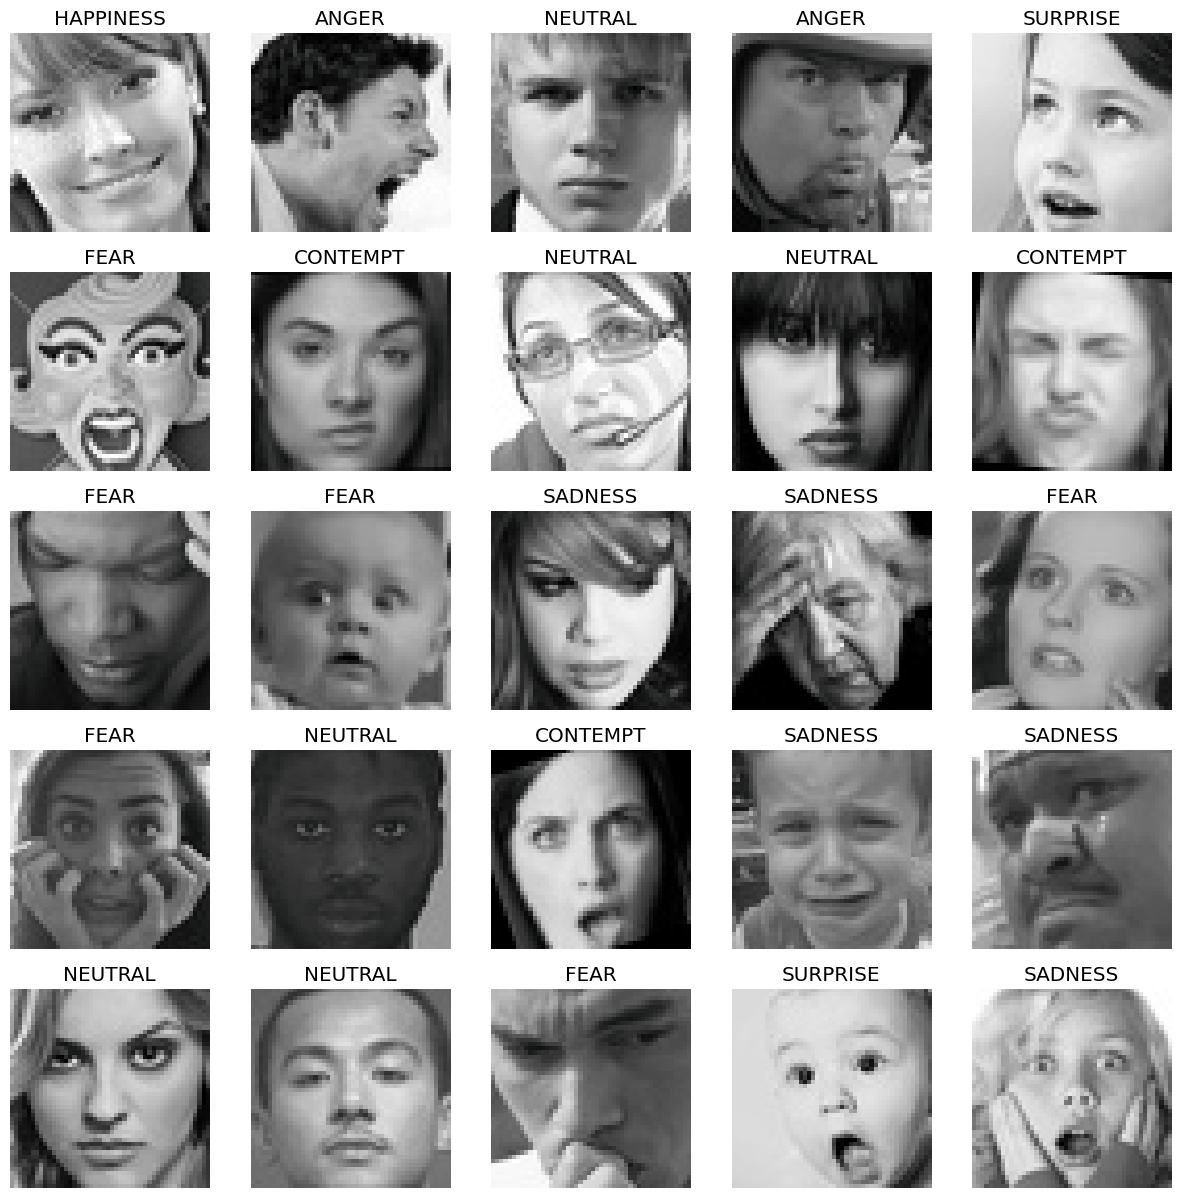

In [ ]:
dls.show_batch(max_n=25)

In [ ]:
learn = vision_learner (dls, vgg19_bn, metrics = [error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:06<00:00, 89.4MB/s]


SuggestedLRs(valley=0.002511886414140463)

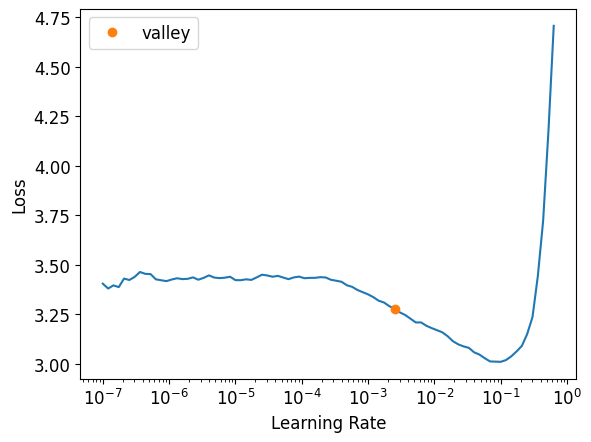

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(40,3.25e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.579578,1.848241,0.676673,0.323327,01:05
1,2.107322,1.683891,0.626283,0.373717,00:57
2,1.741220,1.531644,0.584316,0.415684,00:57
3,1.498240,1.416295,0.544187,0.455813,01:05
4,1.349864,1.352423,0.523357,0.476643,00:57
5,1.286826,1.263616,0.484301,0.515699,01:20
6,1.213086,1.208247,0.460407,0.539593,01:03
7,1.166494,1.198143,0.451371,0.548629,00:59
8,1.130088,1.201310,0.449533,0.550467,00:59
9,1.096323,1.179365,0.442641,0.557359,00:58


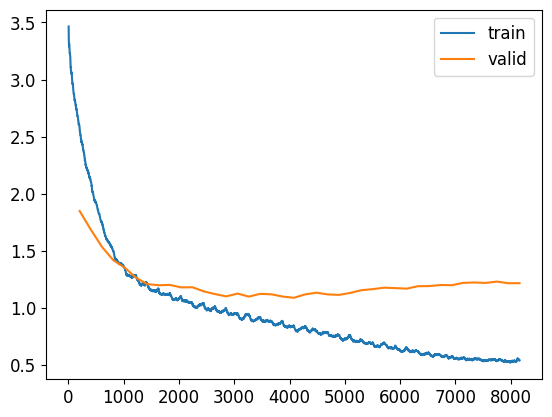

In [ ]:
learn.recorder.plot_loss()

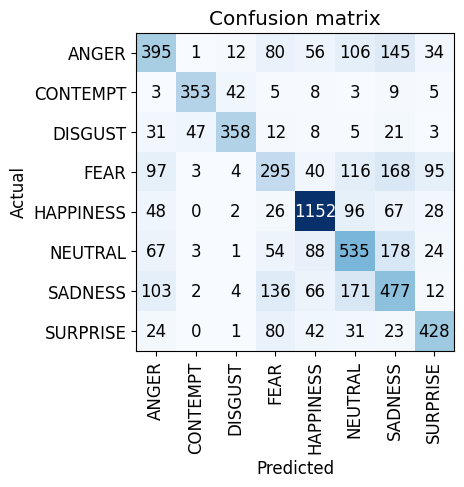

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

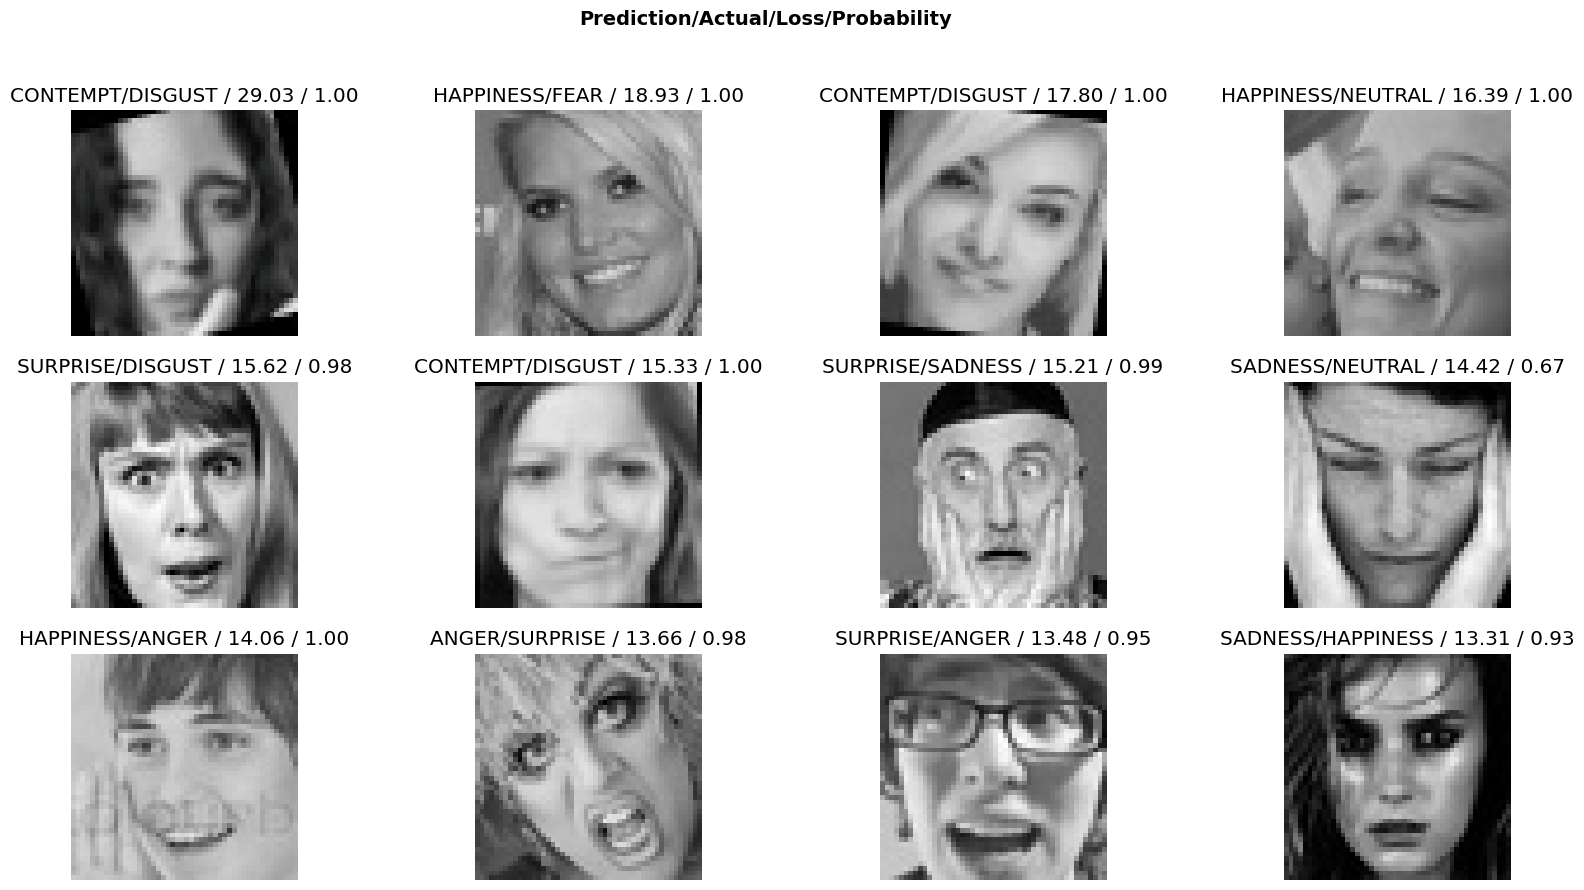

In [ ]:
interp.plot_top_losses(12, figsize=(20,10))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

       ANGER       0.51      0.48      0.49       829
    CONTEMPT       0.86      0.82      0.84       428
     DISGUST       0.84      0.74      0.79       485
        FEAR       0.43      0.36      0.39       818
   HAPPINESS       0.79      0.81      0.80      1419
     NEUTRAL       0.50      0.56      0.53       950
     SADNESS       0.44      0.49      0.46       971
    SURPRISE       0.68      0.68      0.68       629

    accuracy                           0.61      6529
   macro avg       0.63      0.62      0.62      6529
weighted avg       0.61      0.61      0.61      6529



In [ ]:
import time

def get_turkey_time():
    # Türkiye'nin saat dilimi (GMT+3)
    utc_offset = 3 * 60 * 60  # 3 saatlik fark saniye cinsinden
    current_time_utc = time.time()

    # Şu anki zamanı Türkiye saatine çevir
    turkey_time_seconds = current_time_utc + utc_offset
    return turkey_time_seconds

In [ ]:
timeTR="fast_"+time.strftime("%d-%m-%Y_%H:%M", time.localtime(get_turkey_time()))
modelPath="/content/gdrive/MyDrive/halukiAI/"+timeTR # modelin nereye kaydedileceği
learn.save(modelPath)

Path('/content/gdrive/MyDrive/halukiAI/fast_05-01-2024_21:14.pth')

In [ ]:
!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.6 MB/s eta 0:00:00


In [ ]:
learn.export(modelPath+'.pkl')

In [ ]:
path = Path('/content/fer/')# ana klasör yolumuz

In [ ]:
all_files= get_image_files(path)

In [ ]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
splitter=GrandparentSplitter(train_name='val',valid_name='val'),
get_y=parent_label,
item_tfms=Resize(48,method='squish'),
batch_tfms=Normalize.from_stats(*imagenet_stats))

In [ ]:
dls_test = dblock.dataloaders(all_files)

In [ ]:
learn1 = vision_learner(dls_test, vgg19_bn, metrics=accuracy).load(modelPath)

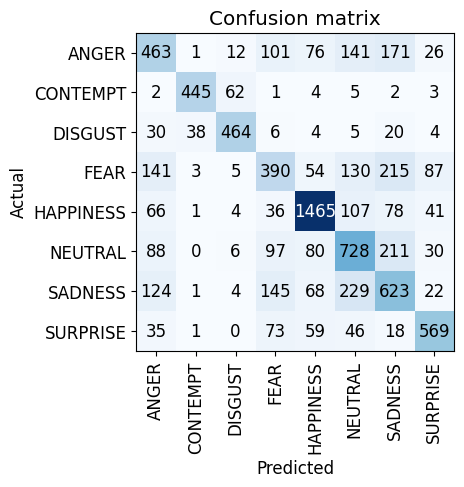

In [ ]:
interp= ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [ ]:
preds, targs = learn1.tta()
accuracy(preds, targs).item()

0.6302963495254517

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

       ANGER       0.49      0.47      0.48       991
    CONTEMPT       0.91      0.85      0.88       524
     DISGUST       0.83      0.81      0.82       571
        FEAR       0.46      0.38      0.42      1025
   HAPPINESS       0.81      0.81      0.81      1798
     NEUTRAL       0.52      0.59      0.55      1240
     SADNESS       0.47      0.51      0.49      1216
    SURPRISE       0.73      0.71      0.72       801

    accuracy                           0.63      8166
   macro avg       0.65      0.64      0.65      8166
weighted avg       0.63      0.63      0.63      8166



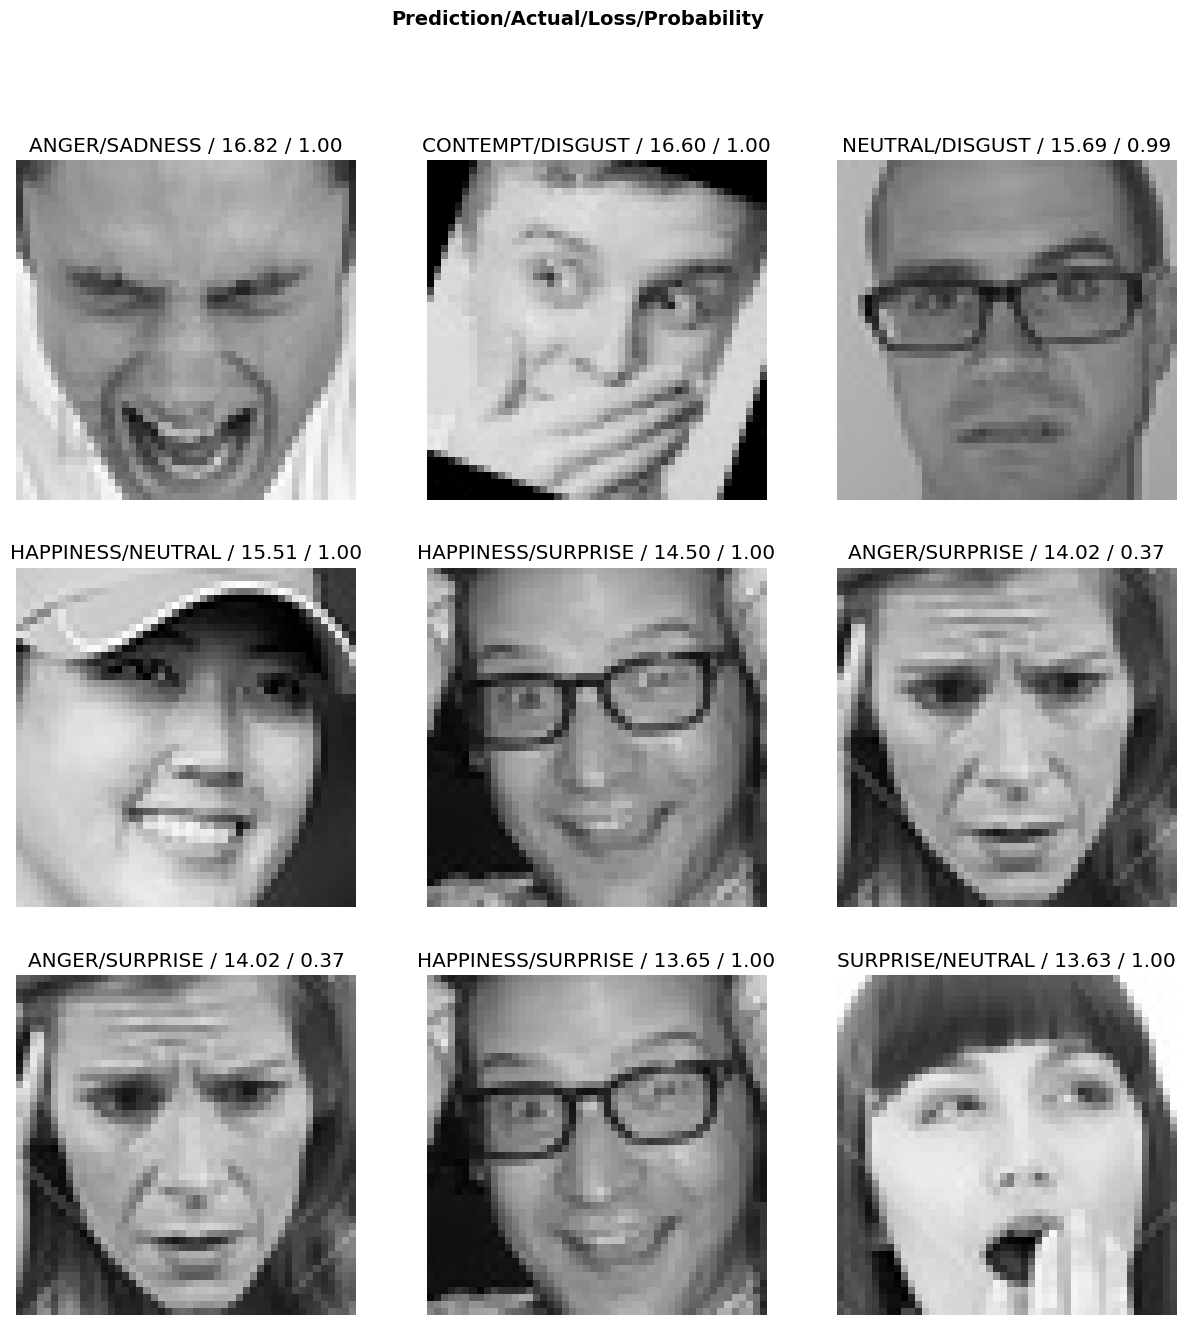

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

In [ ]:
losses,idxs = interp.top_losses(10)
print(idxs)
print(losses)

TensorBase([5812, 5060, 5114,  794, 3565, 3267, 3299, 2857, 1597, 3929])
TensorBase([16.8154, 16.6032, 15.6858, 15.5064, 14.5040, 14.0193, 14.0193, 13.6458, 13.6277, 13.3049])
